# **Data** **Import**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving training_ib.csv to training_ib.csv


In [ ]:
import io
train_df = pd.read_csv(io.BytesIO(uploaded['training_ib.csv']))

In [ ]:
train_df

,Unnamed: 0,id,text,class
0,0,1,This CREDIT AGREEMENT is entered into as of No...,Preamble
1,1,2,This agreement is dated 22 December 2014 and m...,Preamble
2,2,3,This Agreement and shall be governed by and in...,Governing Law
3,3,4,The choice of South African law as the governi...,Governing Law
4,4,5,This agreement and other loan documents shall ...,Governing Law
5,5,6,Eligible receivables are not subject to any li...,Other
6,6,7,Acceptance Condition means the condition with ...,Other
7,7,8,Borrowers will indemnify each Lender against a...,Indemnification
8,8,9,"The Borrower shall indemnify all parties, and ...",Indemnification
9,9,10,Administrative Agent shall be entitled to reim...,Indemnification


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testing_ib.csv to testing_ib.csv


In [ ]:
import io
test_df = pd.read_csv(io.BytesIO(uploaded['testing_ib.csv']))

In [ ]:
test_df.head()

,id,text
0,1,"Amendment No. 1 dated as of February 4, 2016 (..."
1,2,"Subject to the Legal Reservations, (a) the cho..."
2,3,"This Agreement, and any non-contractual obliga..."
3,4,Each Lender agrees to indemnify the Administra...
4,5,Any Lender that (a) has failed to (i) fund all...


In [ ]:
test_id = test_df['id']
test_text = test_df['text']

In [ ]:
y_train = train_df['class']

In [ ]:
y_train.value_counts()

Indemnification      6
Governing Law        5
Preamble             5
Other                5
Lender Defaulting    5
Name: class, dtype: int64

# **Data** **Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Vs Frequency')

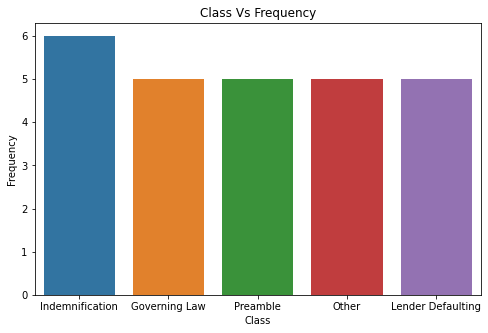

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(y_train.value_counts().index,y_train.value_counts().values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title("Class Vs Frequency")

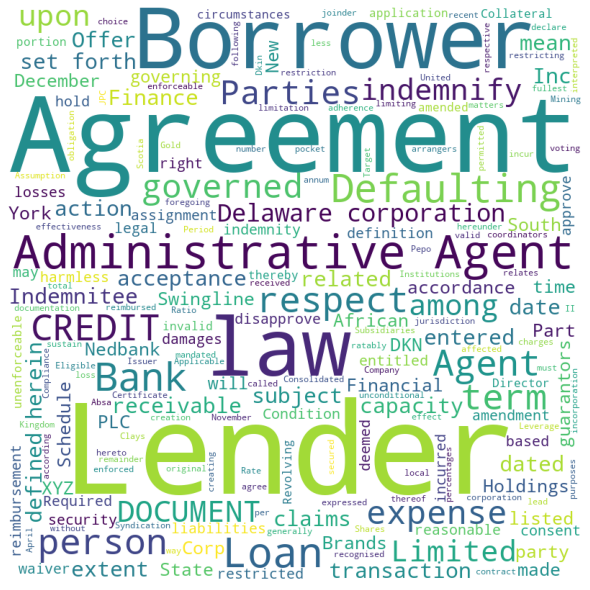

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
total_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in train_df['text']:
     
    # typecaste each val to string
    val = str(val)

    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
 
    # split the value
    tokens = val.split()
    total_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords=stopwords,
                min_font_size = 10).generate(total_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# **Data** **Preprocessing**

In [ ]:
import re 
import string
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer , word_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess(text):
    #lowercasing the text
    text = text.lower() 
    #removing punctuation
    PUN = string.punctuation
    text = text.translate(str.maketrans('','',PUN)) 
    #Removing stopwords
    STOPWORDS = set(stopwords.words('english'))
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS]) 

    return text

In [ ]:
train_df['text'] = train_df['text'].apply(lambda text:preprocess(text))

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemm = WordNetLemmatizer()
word_map = {'N':wordnet.NOUN,'V':wordnet.VERB,'J':wordnet.ADJ,'R':wordnet.ADV}

def lemmatize(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    text = ' '.join(lemm.lemmatize(word,word_map.get(pos[0],wordnet.NOUN)) for word,pos in pos_tagged_text)
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
train_df['text'] = train_df['text'].apply(lambda text:lemmatize(text))

In [ ]:
for item in train_df['text']:
  print(item)

credit agreement enter november 23 2010 among dkin finance corp delaware corporation borrower upon effectiveness joinder agreement dkn brand holding inc delaware corporation upon assumption dkn brand inc delaware corporation lender time time party hereto clays bank plc administrative agent swingline lender lc issuer
agreement date 22 december 2014 make party xyz gold mining company limit subsidiary borrower list part schedule 1 original guarantor absa bank limit nedbank limited coordinator financial institution list part ii schedule 1 mandate lead arranger lender nedbank limit agent finance party
agreement shall govern interpreted accordance law state new york
choice south african law govern law finance document express govern south african law recognise enforced jurisdiction incorporation
agreement loan document shall govern adherence law unite kingdom
eligible receivables subject limitation assignment restriction would local govern law contract create receivable effect restrict assig

In [ ]:
test_df['text'] = test_df['text'].apply(lambda text:preprocess(text))
test_df['text'] = test_df['text'].apply(lambda text:lemmatize(text))

In [ ]:
for item in test_df['text']:
  print(item)

amendment 1 date february 4 2016 amendment 1 amendment restatement agreement date january 10 2016 exist restatement agreement among ggg hold u inc borrower cgg societe anonyme incorporate law france parent lender time time party thereto suisse ag administrative agent lender capacity administrative agent collateral agent collateral agent lender
subject legal reservation choice law specify eachfinance document govern law finance document recognize enforced relevant jurisdiction andb judgment obtain new york jurisdiction govern law finance document relation finance document recognize enforced relevant jurisdiction
agreement noncontractual obligation arise connection shall govern construe accordance english law
lender agree indemnify administrative agent hold harmless rateably accord applicable percentage loss claim damage liability related expense include fee charge disbursement counsel may incur assert administrative agent way relate arise loan document transaction therein contemplate
le

# **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,1),analyzer='word',min_df=5,max_df=0.8)
countvec = CountVectorizer(ngram_range=(1,1),analyzer='word')

In [ ]:
y_train = train_df['class']
train_df = train_df.drop(['Unnamed: 0','id','class'],axis=1)
test_df = test_df.drop(['id'],axis=1)

In [ ]:
total_df = pd.concat([train_df,test_df],axis=0).reset_index().drop('index',axis=1)

In [ ]:
total_df

,text
0,credit agreement enter november 23 2010 among ...
1,agreement date 22 december 2014 make party xyz...
2,agreement shall govern interpreted accordance ...
3,choice south african law govern law finance do...
4,agreement loan document shall govern adherence...
5,eligible receivables subject limitation assign...
6,acceptance condition mean condition respect nu...
7,borrower indemnify lender loss expense may sus...
8,borrower shall indemnify party relate party fo...
9,administrative agent shall entitle reimburseme...


In [ ]:
tfidf.fit(total_df['text'])
countvec.fit(total_df['text'])

CountVectorizer()

In [ ]:
X_train_tf = tfidf.transform(train_df['text']).toarray()
X_test_tf = tfidf.transform(test_df['text']).toarray()
X_train_cv = countvec.transform(train_df['text']).toarray()
X_test_cv = countvec.transform(test_df['text']).toarray()

In [ ]:
print(X_train_tf.shape)
print(X_train_cv.shape)
print(X_test_tf.shape)
print(X_test_cv.shape)

(26, 20)
(26, 333)
(10, 20)
(10, 333)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca_tf = PCA(n_components=2).fit(X_train_tf)
pca_cv = PCA(n_components=2).fit(X_train_cv)

X_train_red_tf = pca_tf.transform(X_train_tf)
X_test_red_tf = pca_tf.transform(X_test_tf)
X_train_red_cv = pca_cv.transform(X_train_cv)
X_test_red_cv = pca_cv.transform(X_test_cv)

# **Model** **Building**

In [ ]:
labels = {
    'Preamble':1,
     'Governing Law':2,
     'Other':3,
     'Indemnification':4,
     'Lender Defaulting':5
}

rev_labels = {
    1:'Preamble',
    2:'Governing Law',
    3:'Other',
    4:'Indemnification',
    5:'Lender Defaulting'
}

In [ ]:
target = []
for item in y_train:
  target.append(labels[item])

In [ ]:
target

[1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 1, 3, 2, 4, 1, 2, 4, 1, 5, 5, 5, 3, 3]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from numpy import mean
from numpy import std

In [ ]:
tf_scores = []
cv_scores = []
red_tf_scores = []
red_cv_scores = []

In [ ]:
def model_performance(model):
  cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
  scores1 = cross_val_score(model, X_train_tf,target, scoring='accuracy', cv=cv, n_jobs=-1)
  scores2 = cross_val_score(model, X_train_cv,target, scoring='accuracy', cv=cv, n_jobs=-1)
  scores3 = cross_val_score(model, X_train_red_tf,target, scoring='accuracy', cv=cv, n_jobs=-1)
  scores4 = cross_val_score(model, X_train_red_cv,target, scoring='accuracy', cv=cv, n_jobs=-1)

  print('Accuracy tf: %.3f (%.3f)' % (mean(scores1), std(scores1)))
  print('Accuracy cv: %.3f (%.3f)' % (mean(scores2), std(scores2)))
  print('Accuracy red tf: %.3f (%.3f)' % (mean(scores3), std(scores3)))
  print('Accuracy red cv: %.3f (%.3f)' % (mean(scores4), std(scores4)))

  tf_scores.append(mean(scores1))
  cv_scores.append(mean(scores2))
  red_tf_scores.append(mean(scores3))
  red_cv_scores.append(mean(scores4))

In [ ]:
svc = SVC()

model_performance(svc)

Accuracy tf: 0.847 (0.148)
Accuracy cv: 0.687 (0.165)
Accuracy red tf: 0.687 (0.107)
Accuracy red cv: 0.427 (0.155)


In [ ]:
rfc = RandomForestClassifier()
model_performance(rfc)

Accuracy tf: 0.887 (0.093)
Accuracy cv: 0.847 (0.148)
Accuracy red tf: 0.487 (0.215)
Accuracy red cv: 0.733 (0.084)


In [ ]:
lr = LogisticRegression()
model_performance(lr)

Accuracy tf: 0.887 (0.093)
Accuracy cv: 0.727 (0.164)
Accuracy red tf: 0.540 (0.150)
Accuracy red cv: 0.507 (0.116)


In [ ]:
knn = KNeighborsClassifier()
model_performance(knn)

Accuracy tf: 0.847 (0.078)
Accuracy cv: 0.493 (0.172)
Accuracy red tf: 0.647 (0.157)
Accuracy red cv: 0.620 (0.160)


In [ ]:
gnb = GaussianNB()
model_performance(gnb)

Accuracy tf: 0.887 (0.093)
Accuracy cv: 0.687 (0.165)
Accuracy red tf: 0.727 (0.104)
Accuracy red cv: 0.540 (0.080)


In [ ]:
models = ['SVC','Random Forest','Logistic Regression','Knn','naive bayes']

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

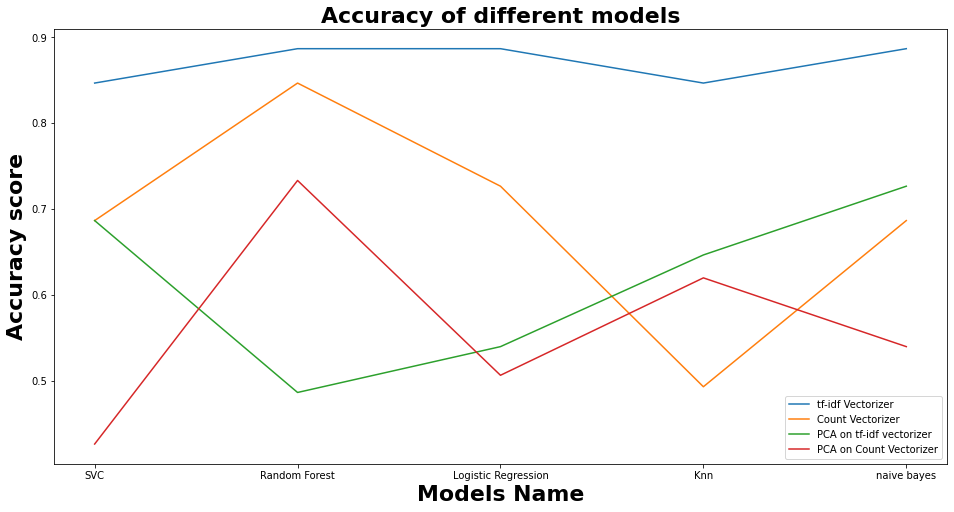

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(models,tf_scores, label = "tf-idf Vectorizer")
plt.plot(models,cv_scores, label = "Count Vectorizer")
plt.plot(models,red_tf_scores, label = "PCA on tf-idf vectorizer")
plt.plot(models,red_cv_scores, label = "PCA on Count Vectorizer")
plt.xlabel('Models Name',**font)
plt.ylabel('Accuracy score',**font)
plt.title('Accuracy of different models',**font)
plt.legend()
plt.show()

# **Final Model**

In [ ]:
parameters = {
    'n_estimators':[5,10,12,15],
    'max_depth':[5,8,10,12,15],
    'min_samples_split':[2],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_samples_leaf':[1,2,3]
}

cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
rfc = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(rfc, parameters,cv=cv,scoring='accuracy',error_score='raise')
clf.fit(X_train_tf,target)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'n_estimators': [5, 10, 12, 15]},
             scoring='accuracy')

In [ ]:
clf.best_score_

0.9266666666666667

In [ ]:
clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 15}

In [ ]:
final_model = RandomForestClassifier(n_estimators=15,max_depth=10,min_samples_leaf=1,min_samples_split=2,max_features='log2')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train_tf,target,test_size=6,stratify=target)

In [ ]:
final_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=15)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score

In [ ]:
pred = final_model.predict(X_val)

print(pred)
print(Y_val)

[4 5 4 1 2 4]
[4, 5, 4, 1, 2, 3]


**Confusion** **Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(pred,Y_val)

In [ ]:
import matplotlib.pyplot as plt
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Preamble','Governing Law','Other','Indemnification','Lender Defaulting'], 
                     columns = ['Preamble','Governing Law','Other','Indemnification','Lender Defaulting'])

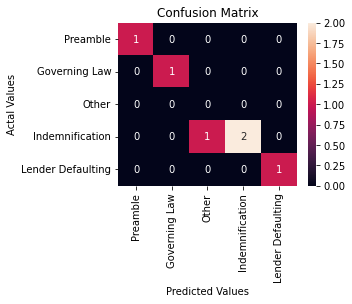

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy , Precision , Recall , F1 Score , ROC-AUC 

In [ ]:
accuracy = accuracy_score(pred,Y_val)
print('Accuracy: %f' % accuracy)
 # precision tp / (tp + fp)
precision = precision_score(pred,Y_val, average = 'macro')
print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
recall = recall_score(pred,Y_val, average = 'micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(pred,Y_val,average = 'micro')
print('F1 score: %f' % f1)


Accuracy: 0.833333
Precision: 0.800000
Recall: 0.833333
F1 score: 0.833333


In [ ]:
# ROC AUC
# predict classes for test set
y_probs = final_model.predict_proba(X_val)
auc = roc_auc_score(Y_val, y_probs,multi_class='ovr')
print('ROC AUC: %f' % auc)

ROC AUC: 1.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


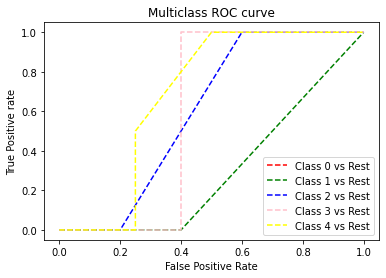

In [ ]:
from sklearn.metrics import roc_curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_val,y_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='pink', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [ ]:
final_model = RandomForestClassifier(n_estimators=15,max_depth=10,min_samples_leaf=1,min_samples_split=2,max_features='log2')
final_model.fit(X_train_tf,target)
predictions = final_model.predict(X_test_tf)
pred_prob = final_model.predict_proba(X_test_tf)

In [ ]:
probablities = np.amax(pred_prob, axis=1) 

In [ ]:
final_df = pd.DataFrame({'id':test_id,'text':test_text,'class':predictions,'confidence score':probablities})

In [ ]:
final_df['class'] = final_df['class'].apply(lambda x : rev_labels[x])

In [ ]:
final_df

,id,text,class,confidence score
0,1,amendment 1 date february 4 2016 amendment 1 a...,Preamble,0.666667
1,2,subject legal reservation choice law specify e...,Governing Law,0.666667
2,3,agreement noncontractual obligation arise conn...,Governing Law,0.866667
3,4,lender agree indemnify administrative agent ho...,Indemnification,0.800000
4,5,lender fail fund portion loan within two busin...,Other,0.400000
5,6,assignment assumption shall govern construe ac...,Governing Law,0.733333
6,7,soon practicable payment indemnify tax tax obl...,Indemnification,0.600000
7,8,nondefaulting lender mean time lender default ...,Lender Defaulting,0.800000
8,9,fundco facility agreement mean facility agreem...,Other,0.400000
9,10,notwithstanding provision agreement contrary l...,Lender Defaulting,0.666667


In [ ]:
final_df.to_json('predictions_file.json',orient = 'split', compression = 'infer', index = 'true')

In [ ]:
final_df.to_csv('final_df.csv',index=None)